![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Problemas Clássicos da Computação

## Preditores Bayesianos e Lineares

- Professor: Felipe Reis


### Referências

O presente tutorial foi inspirado em:

* http://daydreamingnumbers.com/blog/introduction-naive-bayes-algorithm-python/
* https://in.springboard.com/blog/naive-bayes-classification/
* https://medium.com/bite-sized-machine-learning/linear-regression-example-in-sklearn-4d4ff244ac44


### Bibliotecas Necessárias

As bibliotecas necessárias à execução desse tutorial:
* Numpy: https://numpy.org/
* Matplotlib: https://matplotlib.org/
* Pandas: https://pandas.pydata.org/
* Sciki-Learn: https://scikit-learn.org/

---
### Instalação de Bibliotecas

In [1]:
# Execute essa linha para instalação no Google Colab
# Os pacotes numpy e matplotlib não precisam ser instalados
# Caso esteja usando seu computador pessoal, instale o pacote via linha de comando.

#!pip install -U pandas
#!pip install -U scikit-learn

---
### Importação de bibliotecas 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import load_wine, load_digits, load_boston
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.metrics import plot_roc_curve, roc_curve, auc, confusion_matrix

---
### Funções Úteis

In [3]:
def print_confusion_matrix_digits(confusion_matrix):
    cm = confusion_matrix
    
    #imprime matriz de confusão
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
    plt.title('Confusion matrix', size = 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
    plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
    plt.tight_layout()
    plt.ylabel('Actual label', size = 15)
    plt.xlabel('Predicted label', size = 15)
    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

In [4]:
def split_data(x_data, y_data):
    return train_test_split(
            x_data,
            y_data, 
            test_size = 0.3, #percentual do conjunto de treino
            random_state = 10 #seed random, para resultados semelhantes
    )

In [5]:
def print_reg_linear(lin_reg, x_test, y_test, preds):
    print("Erro médio quadrático: %.2f" % mean_squared_error(y_test, preds))

    #gráfico
    plt.figure(figsize=(10, 8))
    plt.scatter(x_test, y_test,linewidth=0.1,alpha=0.5)
    plt.plot(x_test, preds, color='green', linewidth=3)
    #plt.xlabel('Variável avaliada')
    plt.ylabel('Preço do imóvel')
    plt.title('Preço imóvel: = %.2f + %.2f * x'% (lin_reg.intercept_, lin_reg.coef_[0]))
    plt.show()

---
## Naïve Bayes 

### Play Tennis Dataset

Para desenvolvimento desta seção, será utilizada a base de dados de exemplo Play Tenis, traduzida manualmente para português.

In [6]:
#carrega a base de dados play tennis
play_tennis = pd.read_csv("PlayTennis.csv")

In [7]:
play_tennis #exibe todos os registros
#play_tennis.head() #exibe somente os primeiros registros

,Previsao,Temperatura,Umidade,Vento,Jogar Tenis
0,Ensolarado,Quente,Alta,Fraco,Nao
1,Ensolarado,Quente,Alta,Forte,Nao
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuva,Moderado,Alta,Fraco,Sim
4,Chuva,Frio,Normal,Fraco,Sim
5,Chuva,Frio,Normal,Forte,Nao
6,Nublado,Frio,Normal,Forte,Sim
7,Ensolarado,Moderado,Alta,Fraco,Nao
8,Ensolarado,Frio,Normal,Fraco,Sim
9,Chuva,Moderado,Normal,Fraco,Sim


In [8]:
#guarda os valores originais, para uso posteriuor
play_tennis_original = play_tennis.copy()

In [9]:
#LabelEncoder converte dados categoricos em valores do intervalo 0-1
labelEncoder = LabelEncoder()

In [10]:
#realiza a transformação
play_tennis['Previsao']    = labelEncoder.fit_transform(play_tennis['Previsao'])
play_tennis['Temperatura'] = labelEncoder.fit_transform(play_tennis['Temperatura'])
play_tennis['Umidade']     = labelEncoder.fit_transform(play_tennis['Umidade'])
play_tennis['Vento']       = labelEncoder.fit_transform(play_tennis['Vento'])
play_tennis['Jogar Tenis'] = labelEncoder.fit_transform(play_tennis['Jogar Tenis'])

play_tennis

,Previsao,Temperatura,Umidade,Vento,Jogar Tenis
0,1,2,0,1,0
1,1,2,0,0,0
2,2,2,0,1,1
3,0,1,0,1,1
4,0,0,1,1,1
5,0,0,1,0,0
6,2,0,1,0,1
7,1,1,0,1,0
8,1,0,1,1,1
9,0,1,1,1,1


In [11]:
#define as features (características) e o objetivo
features = ["Previsao", "Temperatura", "Umidade", "Vento"]
target = "Jogar Tenis"

In [12]:
#divide conjuntos de treino e teste
split = split_data(play_tennis[features], play_tennis[target])
tennis_x_train, tennis_x_test, tennis_y_train, tennis_y_test = split

#impressão de valores (visualização de divisão dos conjuntos)
print(tennis_x_train)
print()
print(tennis_x_test)

    Previsao  Temperatura  Umidade  Vento
2          2            2        0      1
10         1            1        1      0
5          0            0        1      0
11         2            1        0      0
13         0            1        0      0
1          1            2        0      0
0          1            2        0      1
4          0            0        1      1
9          0            1        1      1

    Previsao  Temperatura  Umidade  Vento
3          0            1        0      1
7          1            1        0      1
12         2            2        1      1
6          2            0        1      0
8          1            0        1      1


In [13]:
#criação de modelo Naive Bayes (Gaussiano)
model = GaussianNB()
model.fit(tennis_x_train, tennis_y_train) #treino do preditor

GaussianNB()

In [14]:
#realiza a predição do conjunto de teste e avalia desempenho
tennis_predict = model.predict(tennis_x_test) #predição do conjunto de testes
accuracy = accuracy_score(tennis_y_test, tennis_predict) #definição da acurácia

print(accuracy)

0.8


In [15]:
#obtem um elemento do conjunto de testes (manualmente definido com índice 3)
play_tennis_original[3:4]

,Previsao,Temperatura,Umidade,Vento,Jogar Tenis
3,Chuva,Moderado,Alta,Fraco,Sim


In [16]:
play_tennis[3:4]

,Previsao,Temperatura,Umidade,Vento,Jogar Tenis
3,0,1,0,1,1


In [17]:
#A partir dos registros, temos:
# - Previsão: Chuva = 0
# - Temperatura: Moderada = 1
# - Umidade: Alta = 0
# - Vento: Fraco = 1

previsao = model.predict([[0, 1, 0, 1]])
label = labelEncoder.inverse_transform(previsao)
print('Predição:', label)

Predição: ['Sim']


In [18]:
#substituição do parâmetro vento, para "Forte"
previsao = model.predict([[0, 1, 0, 0]])
label = labelEncoder.inverse_transform(previsao)
print('Predição:', label)

Predição: ['Nao']


### Alteração do Método Naive Bayes 

Na seção iremos comparar os desempenhos dos modelos Gaussiano, Multinomial e de Bernoulli, do algoritmo Naive Bayes.

In [19]:
#(Gaussiano)
gnb = GaussianNB()
gnb.fit(tennis_x_train, tennis_y_train)
tennis_gnb = gnb.predict(tennis_x_test) 
acc_gnb = accuracy_score(tennis_y_test, tennis_gnb)

In [20]:
#(Multinomial)
mnb = MultinomialNB()
mnb.fit(tennis_x_train, tennis_y_train)
tennis_mnb = mnb.predict(tennis_x_test) 
acc_mnb = accuracy_score(tennis_y_test, tennis_mnb)

In [21]:
#(Bernoulli)
bnb = BernoulliNB()
bnb.fit(tennis_x_train, tennis_y_train)
tennis_bnb = bnb.predict(tennis_x_test) 
acc_bnb = accuracy_score(tennis_y_test, tennis_bnb)

In [22]:
print('Gaussiano:', acc_gnb)
print('Multinomial:', acc_mnb)
print('Bernoulli:', acc_bnb)

Gaussiano: 0.8
Multinomial: 0.8
Bernoulli: 0.8


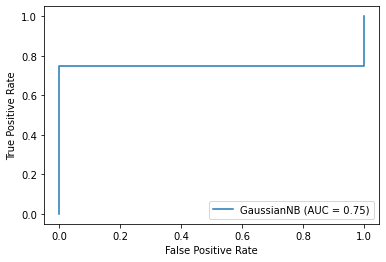

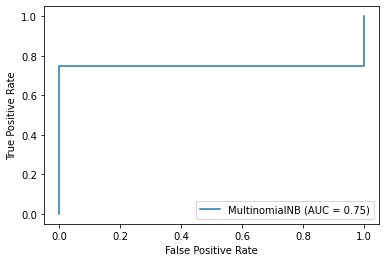

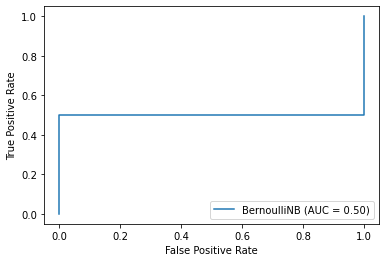

In [23]:
#plot roc curves
plot_roc_curve(gnb, tennis_x_test, tennis_y_test)
plot_roc_curve(mnb, tennis_x_test, tennis_y_test)
plot_roc_curve(bnb, tennis_x_test, tennis_y_test)
plt.show() 

---
### Digits e Wine Datasets

O primeira parte do tutorial utilizará base de dados Wine Dataset, disponível nativamente pela biblioteca Scikit Learn.

Informações sobre as bases de dados:
* Digits Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits
* Wine Dataset: https://sklearn.org/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

#### Digits Dataset

In [24]:
#carrega a base de dados
digits = load_digits()

In [25]:
#imprime o número de registros
print(len(digits.data))

1797


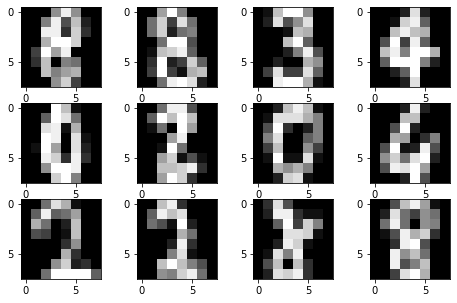

In [26]:
fig=plt.figure(figsize=(8, 5))
plt.gray()
columns = 4
rows = 3

for i in range(1, columns*rows +1):
    idx = random.randrange(0, len(digits.data))
    img = digits.images[idx]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [27]:
#treinamento e classificação, usando métodos Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()

#avalia o método usando cross-validation
digits_gnb = cross_val_score(gnb, digits.data, digits.target, scoring='accuracy', cv=10)
digits_mnb = cross_val_score(mnb, digits.data, digits.target, scoring='accuracy', cv=10)

#imprime os resultados
print('Gaussiano:', digits_gnb.mean())
print('Multinomial:', digits_mnb.mean())

Gaussiano: 0.8113904407200497
Multinomial: 0.8797858472998138


0.8851851851851852


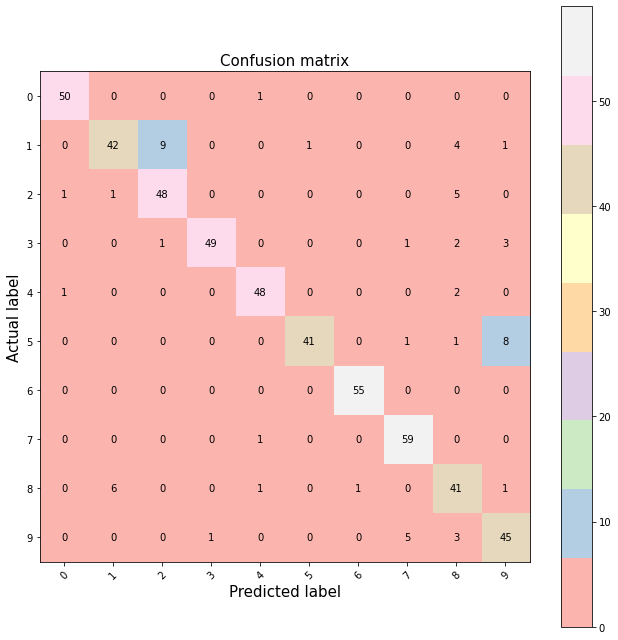

In [28]:
#treinamento e classificação, usando métodos Naive Bayes
mnb = MultinomialNB()

digits_x_train, digits_x_test, digits_y_train, digits_y_test = split_data(digits.data, digits.target)

mnb.fit(digits_x_train, digits_y_train)
mnb_digits_preds = mnb.predict(digits_x_test)
print(mnb.score(digits_x_test, digits_y_test))

#imprime matrix de confusao
cm = confusion_matrix(digits_y_test, mnb_digits_preds)
print_confusion_matrix_digits(cm)

#### Wine Dataset

In [29]:
#carrega a base de dados
wines = load_wine()

In [30]:
#imprime o nome das classes
print(list(wines.target_names))
print(len(wines.data))

['class_0', 'class_1', 'class_2']
178


In [31]:
#treinamento e classificação, usando métodos Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()

#avalia o método usando cross-validation
wine_gnb = cross_val_score(gnb, wines.data, wines.target, scoring='accuracy', cv=10).mean()
wine_mnb = cross_val_score(mnb, wines.data, wines.target, scoring='accuracy', cv=10).mean()

#imprime os resultados
print('Gaussiano:', wine_gnb)
print('Multinomial:', wine_mnb)

Gaussiano: 0.9777777777777779
Multinomial: 0.8496732026143791


---
## Regressão Linear

### Boston House Pricing Dataset

Para desenvolvimento desta seção, será utilizada a base de dados de Boston House Pricing Dataset.
A base de dados está disponível no Kaggle, porém pode ser acessada diretamente pelo biblioteca Scikit-Learning.

Informações sobre a base de dados:
* https://www.kaggle.com/vikrishnan/boston-house-prices

In [32]:
#carrega a base de dados
boston = load_boston()
print(boston.data.shape)

(506, 13)


#### Parte 1 - Preço Imóvel x Número Quartos

Nesta primeira parte, iremos correlacionar o preço do imóvel ao número de quartos por habitação.

In [33]:
#recupera coluna de interesse e valor objetivo (preço imóvel)
boston_no_quartos = boston.data[:,np.newaxis,5] #números de quartos por habitação
boston_preco_imovel = boston.target

In [34]:
#divisão dos conjuntos de treino e testes
boston_x_train, boston_x_test, boston_y_train, boston_y_test = split_data(boston_no_quartos, boston_preco_imovel)

In [35]:
#treinamento e predição, usando Regressão Linear
lin_reg= LinearRegression()

lin_reg.fit(boston_x_train, boston_y_train)
boston_linreg_preds = lin_reg.predict(boston_x_test)

Erro médio quadrático: 45.08


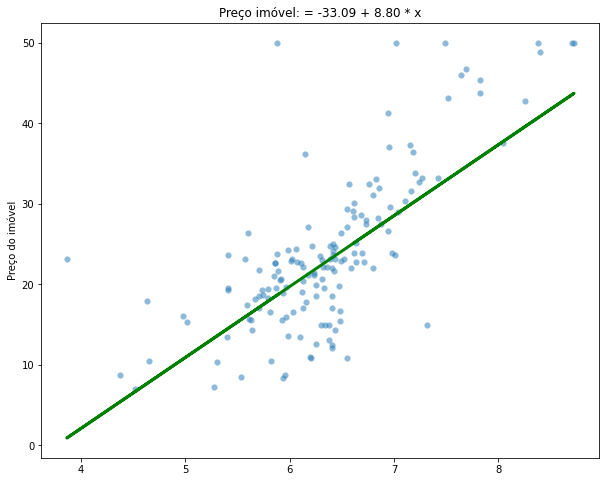

In [36]:
#impressão de erro médio quadrático
print_reg_linear(lin_reg, boston_x_test, boston_y_test, boston_linreg_preds)

#### Parte 2 - Preço Imóvel x Distância Ponderada Centro Comerciais/Empresariais

Nesta segunda parte, iremos correlacionar o valor do imóvel à distância dos 5 principais centros comerciais/empresariais da cidade.

In [37]:
#recupera coluna de interesse e valor objetivo (preço imóvel)
boston_distancia = boston.data[:,np.newaxis,7] #distâncias ponderadas para cinco centros de empregos de Boston
boston_preco_imovel = boston.target

In [38]:
#divisão dos conjuntos de treino e testes
boston_x_train, boston_x_test, boston_y_train, boston_y_test = split_data(boston_distancia, boston_preco_imovel)

In [39]:
#treinamento e predição, usando Regressão Linear
lin_reg= LinearRegression()

lin_reg.fit(boston_x_train, boston_y_train)
boston_linreg_preds = lin_reg.predict(boston_x_test)

Erro médio quadrático: 98.91


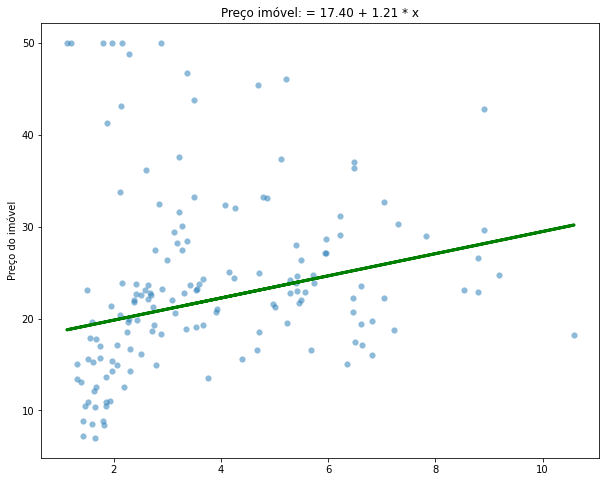

In [40]:
#imprime gráfico
print_reg_linear(lin_reg, boston_x_test, boston_y_test, boston_linreg_preds)

---
## Regressão Logística

Nesta seção, será utilizada a base de dados *Digits*, previamente utilizada.

O algorito de Regressão Logística possui diversas parametrizações, conforme disponível em sua documentação. No entanto, o presente tutorial irá utilizar a versão padrão do algoritmo, disponibilizado pela biblioteca Scikit Learn.

A documentação do algoritmo está disponível em:
* https://sklearn.org/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [41]:
#será utilizada a base de dados 'digits', já previamente carregada

In [42]:
#treinamento e predição, usando Regressão Linear
log_reg = LogisticRegression(max_iter=5000)

log_reg.fit(digits_x_train, digits_y_train)
log_reg_preds = log_reg.predict(digits_x_test)

In [43]:
#impressão da acurácia do modelo
print(log_reg.score(digits_x_test, digits_y_test))

#impressão de erro médio quadrático
print("Erro médio quadrático: %.2f" % mean_squared_error(digits_y_test, log_reg_preds))

0.9648148148148148
Erro médio quadrático: 0.57


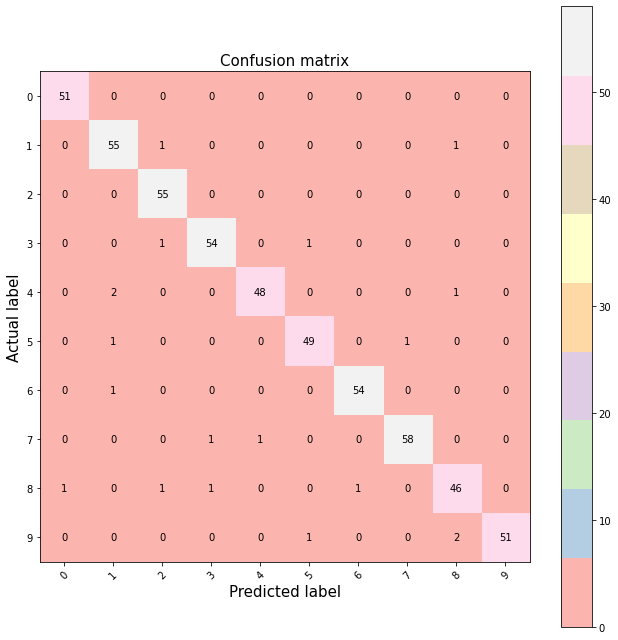

In [44]:
#calcula matriz de confusão
cm = confusion_matrix(digits_y_test, log_reg_preds)

#imprime matrix de confusao
print_confusion_matrix_digits(cm)

---
## Perceptron

Nesta seção, será utilizada a base de dados Digits, previamente utilizada.

O método Perceptron possui diversas parametrizações, conforme disponível em sua documentação. No entanto, o presente tutorial irá utilizar a versão *default* do algoritmo, disponibilizado pela biblioteca Scikit Learn.

A documentação do algoritmo está disponível em:
* https://sklearn.org/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [48]:
#será utilizada a base de dados 'digits', já previamente carregada

In [49]:
#treinamento e predição, usando Regressão Linear
perceptron = Perceptron(max_iter=5000)

perceptron.fit(digits_x_train, digits_y_train)
percep_preds = perceptron.predict(digits_x_test)

In [50]:
#impressão da acurácia do modelo
print(perceptron.score(digits_x_test, digits_y_test))

#impressão de erro médio quadrático
print("Erro médio quadrático: %.2f" % mean_squared_error(digits_y_test, percep_preds))

0.9203703703703704
Erro médio quadrático: 1.58


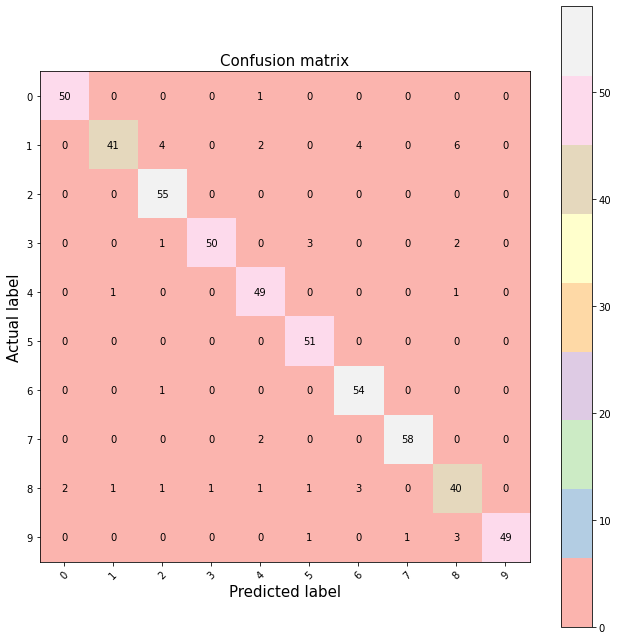

In [51]:
#calcula matriz de confusão
cm = confusion_matrix(digits_y_test, percep_preds)

#imprime matrix de confusao
print_confusion_matrix_digits(cm)